In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [610]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [612]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')
df = df.dropna(subset=['z'])

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53946 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53946 non-null  int64  
 1   carat       53946 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53945 non-null  object 
 4   clarity     53946 non-null  object 
 5   depth       53945 non-null  float64
 6   table       53946 non-null  float64
 7   price       53946 non-null  int64  
 8   x           53946 non-null  float64
 9   y           53946 non-null  float64
 10  z           53946 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [614]:
df.drop(columns="Unnamed: 0", inplace=True)

In [615]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53942,0.80,Ideal,E,SI2,60.8,56.0,2939,6.02,6.01,3.66
53943,0.73,Ideal,F,VS2,62.7,58.0,2939,5.72,5.77,3.60
53944,0.72,Ideal,E,SI2,62.4,57.0,2939,5.71,5.74,3.57
53945,0.75,Ideal,G,VS2,60.6,55.0,2939,5.93,5.91,3.59


In [616]:
df.duplicated().sum()

np.int64(153)

In [617]:
df.drop_duplicates(inplace=True)

In [618]:
df.isnull().sum()

carat      0
cut        3
color      1
clarity    0
depth      1
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [619]:
df.dropna(axis=0, inplace=True)

In [620]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53788.000000,53788,53788,53788,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000,53788.000000
unique,NaN,8,8,11,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21481,11262,13029,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797793,NaN,NaN,NaN,61.748076,57.458178,3933.121477,5.731222,5.734663,3.538707
std,0.473414,NaN,NaN,NaN,1.429883,2.233732,3988.359598,1.120755,1.141270,0.705079
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,-200.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5327.000000,6.540000,6.540000,4.030000


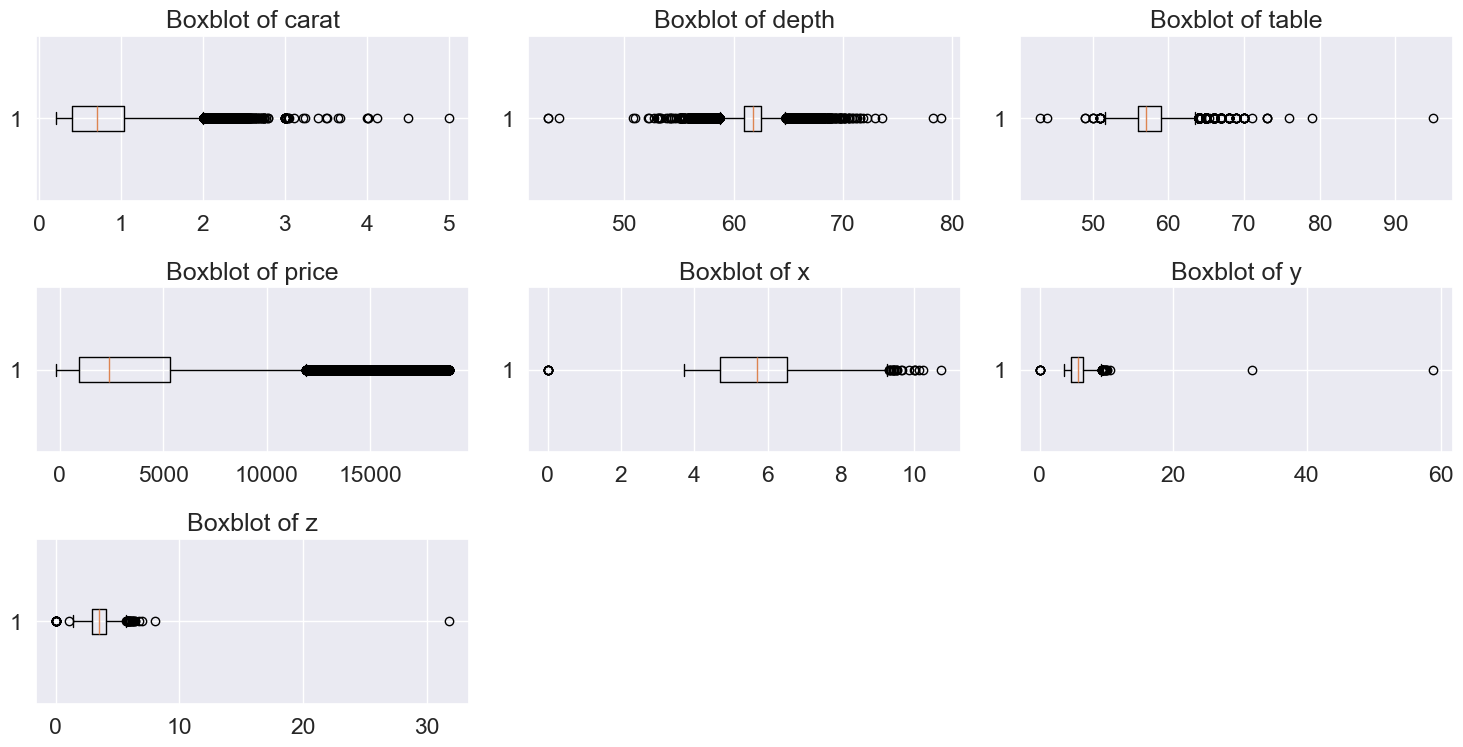

In [621]:
numeric_cols = ["carat", "depth", "table", "price", "x", "y", "z"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxblot of {column}')

plt.tight_layout()
plt.show()

In [622]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [623]:
df['carat'].describe()

count    53788.000000
mean         0.797793
std          0.473414
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

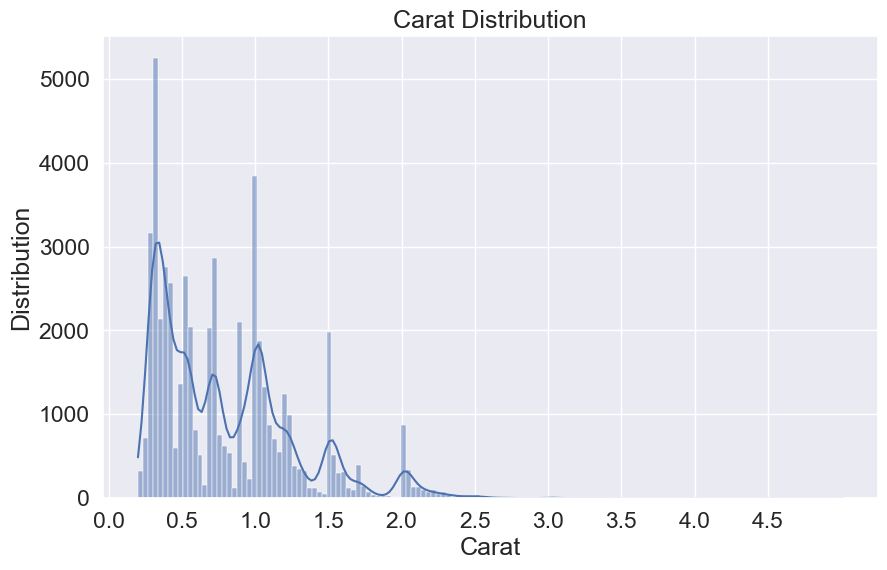

In [624]:
plt.figure(figsize=(10, 6))
sns.histplot(df['carat'], kde=True)
plt.xlabel('Carat')
plt.ylabel('Distribution')
plt.title('Carat Distribution')
plt.xticks(np.arange(0, 5, 0.5))

plt.show()

Right Skewed

In [625]:
df['cut'].value_counts()

cut
Ideal        21481
Premium      13747
Very Good    12065
Good          4891
Fair          1598
ideal            4
very good        1
premium          1
Name: count, dtype: int64

In [626]:
df['cut'] = df['cut'].str.capitalize()

In [627]:
df['cut'].value_counts()

cut
Ideal        21485
Premium      13748
Very good    12066
Good          4891
Fair          1598
Name: count, dtype: int64

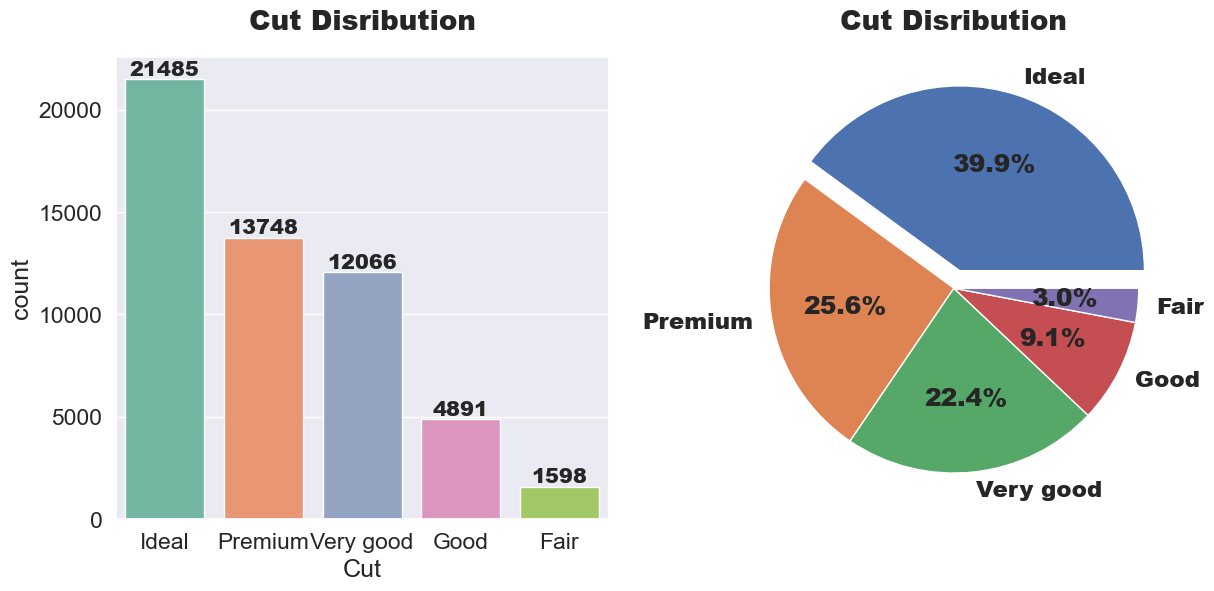

In [628]:
count = df['cut'].value_counts()
order = df['cut'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='cut',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('Cut')
plt.title("Cut Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0])
plt.title("Cut Disribution",fontweight="black",size=20,pad=20)
plt.show()

Ideal is the most frequent cut

In [629]:
df['color'].value_counts()

color
G     11262
E      9774
F      9516
H      8272
D      6754
I      5407
J      2802
87        1
Name: count, dtype: int64

In [630]:
df.drop(df[df['color'] == '87'].index, inplace=True)

In [631]:
df['color'].value_counts()

color
G    11262
E     9774
F     9516
H     8272
D     6754
I     5407
J     2802
Name: count, dtype: int64

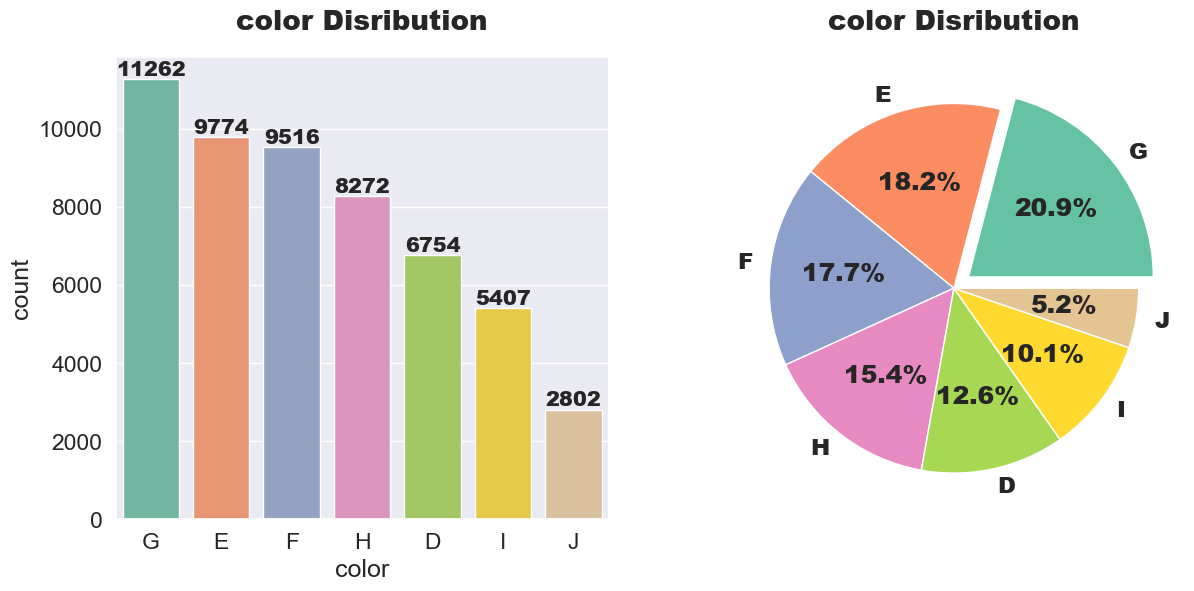

In [632]:
count = df['color'].value_counts()
order = df['color'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='color',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=15)
plt.xlabel('color')
plt.title("color Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0, 0])
plt.title("color Disribution",fontweight="black",size=20,pad=20)
plt.show()

G is the most frequent color

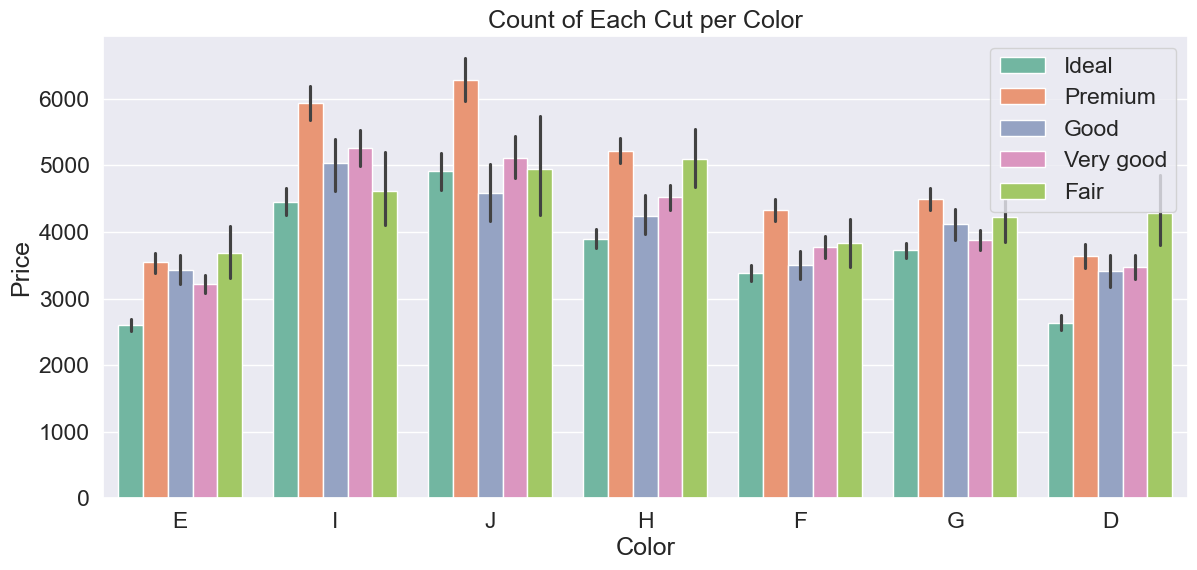

In [633]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x='color', y='price', hue='cut')
plt.title('Count of Each Cut per Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

In [634]:
df['clarity'].value_counts()

clarity
SI1     13029
VS2     12227
SI2      9150
VS1      8152
VVS2     5056
VVS1     3646
IF       1784
I1        740
8           1
7y          1
vs2         1
Name: count, dtype: int64

In [635]:
df['clarity'] = df['clarity'].replace('vs2', 'VS2')
df.drop(df[df['clarity'].isin(['8', '7y'])].index, inplace=True)

In [636]:
df['clarity'].value_counts()

clarity
SI1     13029
VS2     12228
SI2      9150
VS1      8152
VVS2     5056
VVS1     3646
IF       1784
I1        740
Name: count, dtype: int64

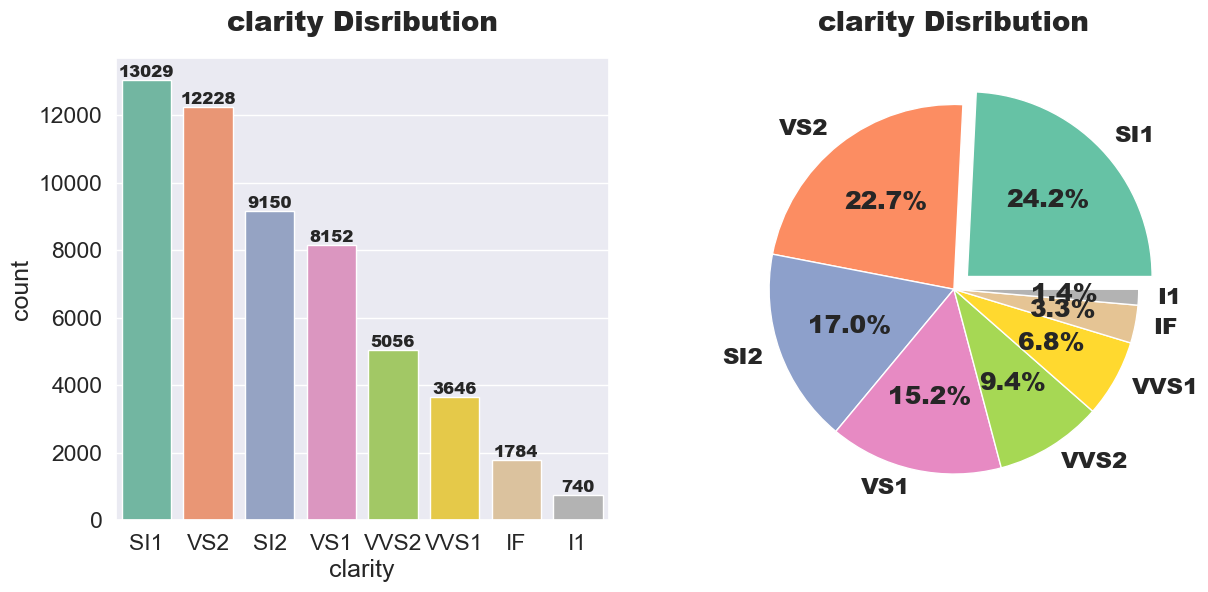

In [637]:
count = df['clarity'].value_counts()
order = df['clarity'].value_counts().index
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x='clarity',order = order, palette="Set2")
for container in ax.containers:
    ax.bar_label(container, fontweight="black", size=12)
plt.xlabel('clarity')
plt.title("clarity Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0.1, 0, 0, 0 , 0, 0, 0, 0])
plt.title("clarity Disribution",fontweight="black",size=20,pad=20)
plt.show()

SI1 represents the quarter of the data followed by VS2

In [638]:
df['depth'].describe()

count    53785.000000
mean        61.748045
std          1.429914
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

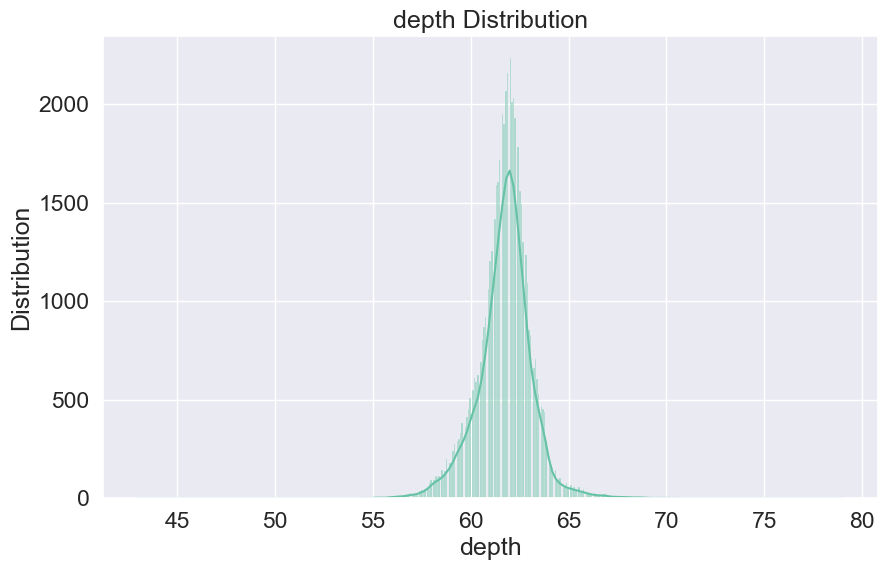

In [639]:
plt.figure(figsize=(10, 6))
sns.histplot(df['depth'], kde=True)
plt.xlabel('depth')
plt.ylabel('Distribution')
plt.title('depth Distribution')

plt.show()

The depth distribution follows the normal distribution

In [640]:
df['table'].describe()

count    53785.000000
mean        57.458130
std          2.233782
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

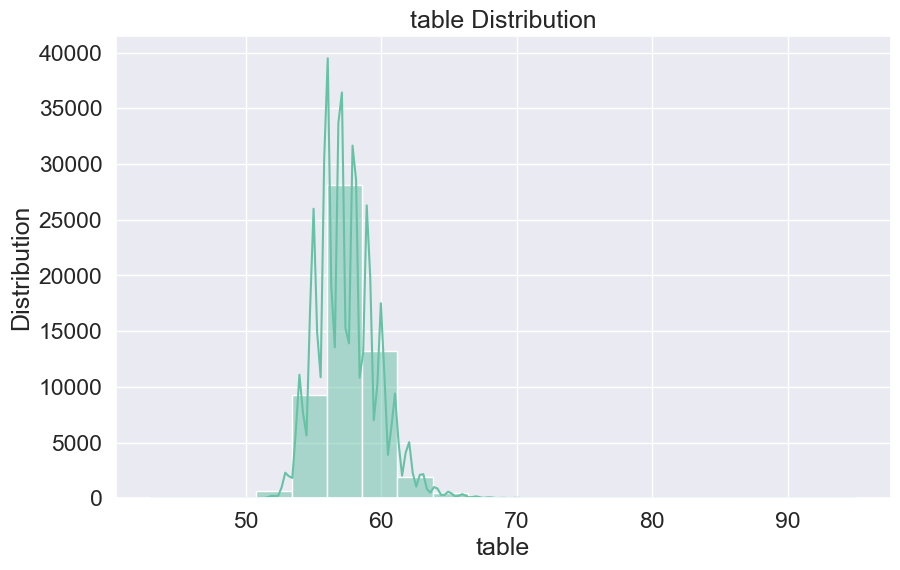

In [641]:
plt.figure(figsize=(10, 6))
sns.histplot(df['table'], kde=True, bins=20)
plt.xlabel('table')
plt.ylabel('Distribution')
plt.title('table Distribution')

plt.show()

In [642]:
df.drop(df[df['price'] < 0].index, inplace=True)

In [643]:
df['price'].describe()

count    53784.000000
mean      3933.303008
std       3988.435550
min        326.000000
25%        951.000000
50%       2401.000000
75%       5327.000000
max      18823.000000
Name: price, dtype: float64

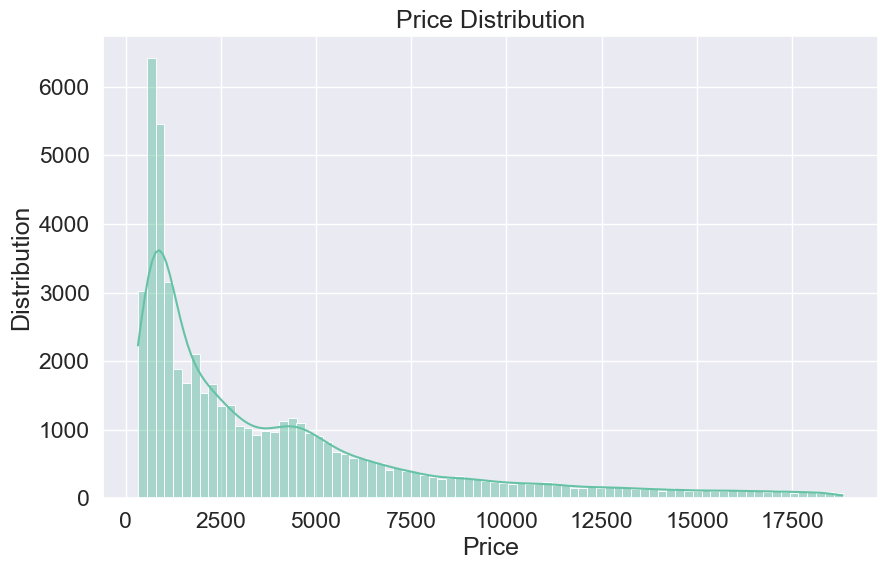

In [644]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')

plt.show()

Right Skewed

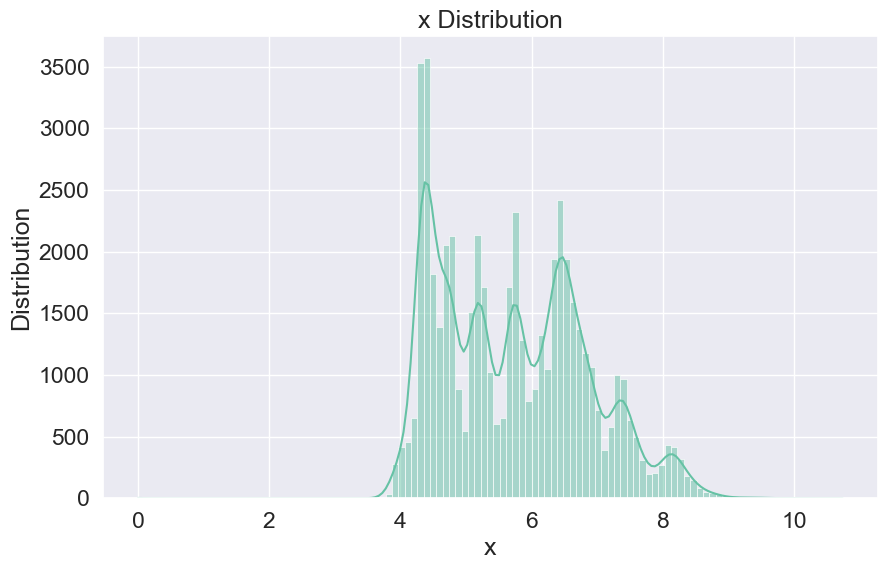

In [645]:
plt.figure(figsize=(10, 6))
sns.histplot(df['x'], kde=True)
plt.xlabel('x')
plt.ylabel('Distribution')
plt.title('x Distribution')

plt.show()

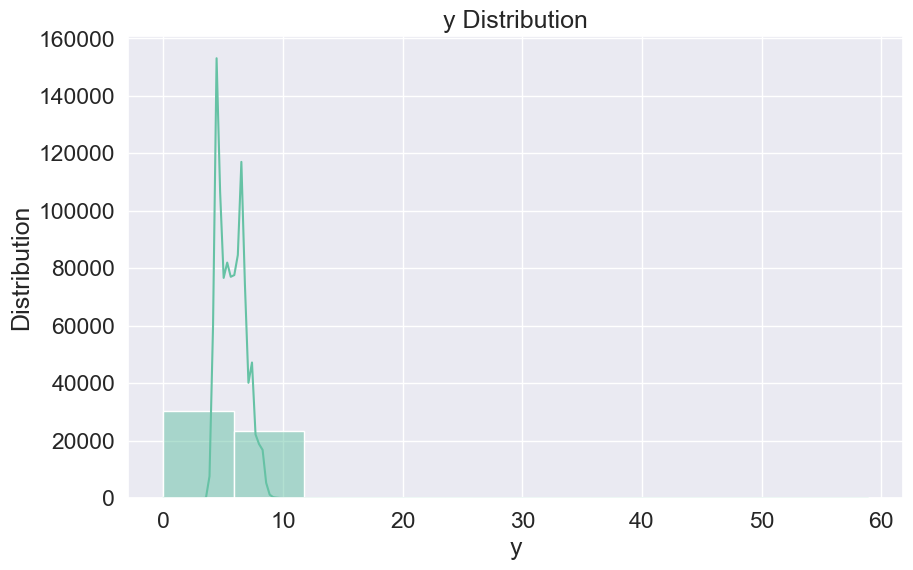

In [646]:
plt.figure(figsize=(10, 6))
sns.histplot(df['y'], kde=True, bins=10)
plt.xlabel('y')
plt.ylabel('Distribution')
plt.title('y Distribution')

plt.show()

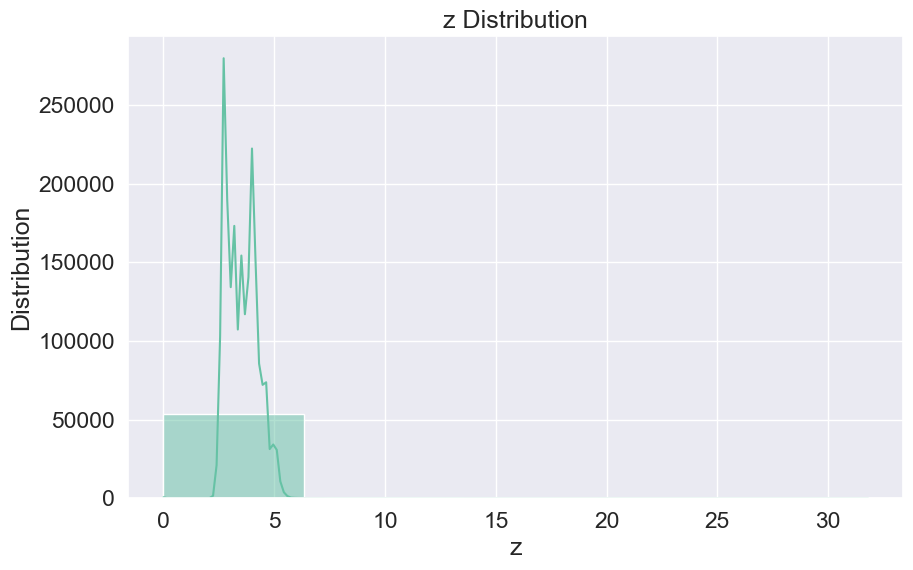

In [647]:
plt.figure(figsize=(10, 6))
sns.histplot(df['z'], kde=True, bins=5)
plt.xlabel('z')
plt.ylabel('Distribution')
plt.title('z Distribution')

plt.show()

In [648]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='carat', ylabel='table'>

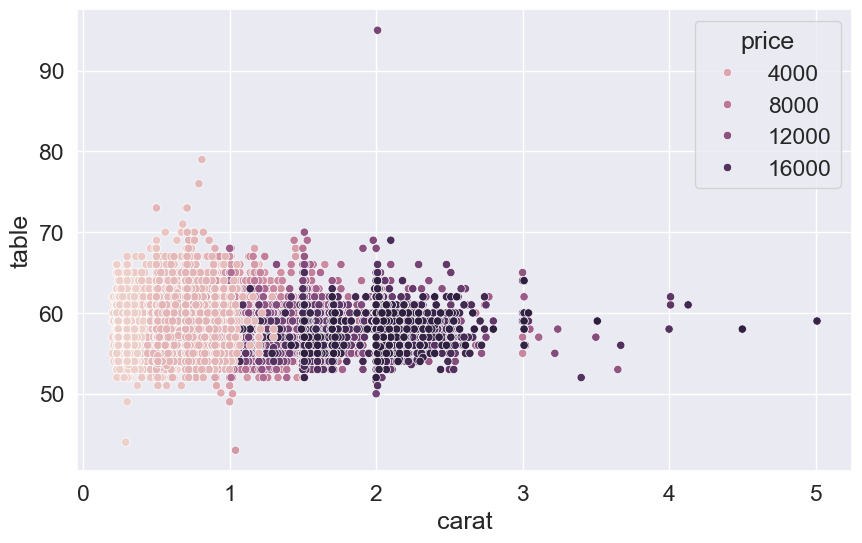

In [649]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='table', hue='price')

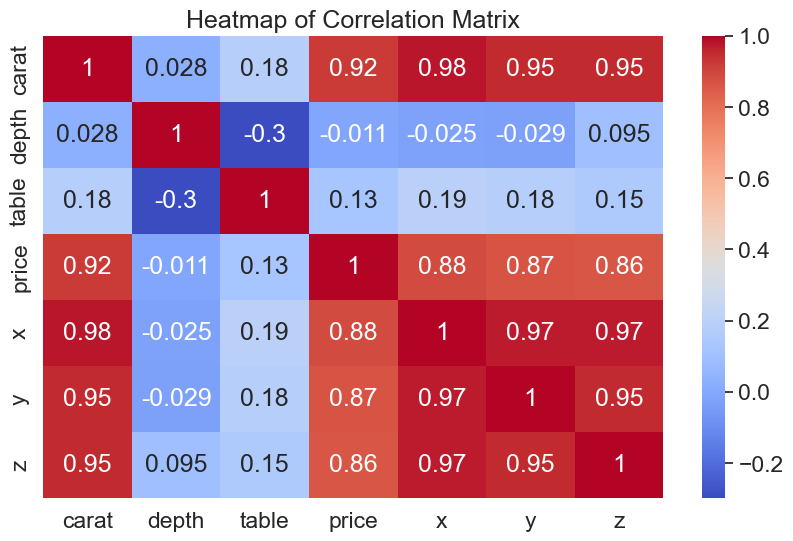

In [650]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [651]:
X = df.drop(columns='price', axis=1)
y = df['price']

In [652]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [653]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [654]:
X_train['carat_logs'] = np.log1p(X_train['carat'])
X_test['carat_logs'] = np.log1p(X_test['carat'])

In [655]:
scaler = StandardScaler()
X_train['table_sc'] = scaler.fit_transform(X_train[['table']])
X_test['table_sc'] = scaler.transform(X_test[['table']])

In [656]:
scaler = RobustScaler()
X_train['depth_rs'] = scaler.fit_transform(X_train[['depth']])
X_test['depth_rs'] = scaler.transform(X_test[['depth']])

In [657]:
scaler = MinMaxScaler()
X_train[['x_mms', 'y_mms', 'z_mms']] = scaler.fit_transform(X_train[['x', 'y', 'z']])
X_test[['x_mms', 'y_mms', 'z_mms']] = scaler.transform(X_test[['x', 'y', 'z']])

In [658]:
X_train = pd.get_dummies(X_train, columns=['color'],drop_first=True)
X_test = pd.get_dummies(X_test, columns=['color'],drop_first=True)

In [659]:
encoder = OrdinalEncoder(categories=[['Fair', 'Very good', 'Good', 'Ideal', 'Premium']])
X_train['cut_encoded'] = encoder.fit_transform(X_train[['cut']])
X_test['cut_encoded'] = encoder.transform(X_test[['cut']])

In [660]:
encoder = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])
X_train['clarity_encoded'] = encoder.fit_transform(X_train[['clarity']])
X_test['clarity_encoded'] = encoder.transform(X_test[['clarity']])

In [661]:
X_train.drop(columns=['carat',  'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], inplace=True)
X_test.drop(columns=['carat',  'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], inplace=True)

In [662]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [663]:
y_pred = model.predict(X_test)

In [664]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


MSE: 1707231.24
RMSE: 1306.61
MAE: 928.91
R²: 0.8892


In [665]:
model.score(X_train, y_train)

0.8863095015236582

In [666]:
model.score(X_test, y_test)

0.8892134930126051

In [667]:
df['price'].describe()

count    53784.000000
mean      3933.303008
std       3988.435550
min        326.000000
25%        951.000000
50%       2401.000000
75%       5327.000000
max      18823.000000
Name: price, dtype: float64

In [668]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [669]:
y_pred = gbr.predict(X_test)

In [670]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

MSE: 468662.11
RMSE: 684.59
MAE: 371.69
R²: 0.9696


In [671]:
gbr.score(X_train, y_train)

0.9710085242371519

In [672]:
gbr.score(X_test, y_test)

0.9695873430943617

In [673]:
X_train

,carat_logs,table_sc,depth_rs,x_mms,y_mms,z_mms,color_E,color_F,color_G,color_H,color_I,color_J,cut_encoded,clarity_encoded
53700,0.530628,-0.652662,-0.333333,0.534451,0.096944,0.110377,False,True,False,False,False,False,3.0,3.0
31881,0.262364,-1.098355,1.266667,0.397579,0.071986,0.085220,False,False,False,True,False,False,2.0,5.0
42144,0.438255,-1.098355,-0.133333,0.490689,0.089813,0.102201,False,False,False,False,True,False,3.0,3.0
10768,0.641854,-0.652662,-0.466667,0.578212,0.105772,0.119497,True,False,False,False,False,False,3.0,2.0
41633,0.277632,-0.652662,0.733333,0.409683,0.074194,0.086792,False,False,False,False,False,True,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11322,0.722706,0.238725,0.200000,0.604283,0.110866,0.127044,False,False,True,False,False,False,3.0,1.0
44879,0.405465,1.130112,-0.466667,0.474860,0.085739,0.097484,False,False,True,False,False,False,4.0,4.0
38281,0.246860,0.238725,0.600000,0.385475,0.070458,0.081761,False,True,False,False,False,False,1.0,3.0
864,0.559616,-1.098355,-0.733333,0.546555,0.100509,0.112579,False,False,False,False,False,False,1.0,2.0


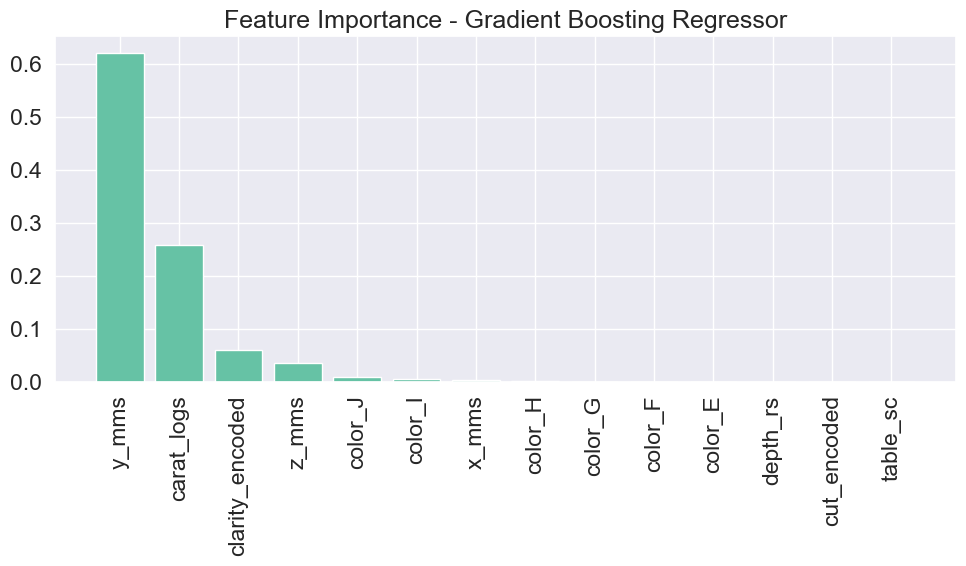

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = [
    "carat_logs", "table_sc", "depth_rs", "x_mms", "y_mms", "z_mms",
    "color_E", "color_F", "color_G", "color_H", "color_I", "color_J",
    "cut_encoded", "clarity_encoded"
]

importances = gbr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()